# **Project: Bank Churn Prediction**

# **Bank Churn Prediction**

# **Objective:**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

# **Context:**

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

# **Data Description:**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

# **Data Dictionary:**

1. RowNumber: Row number.
2. CustomerId: Unique identification key for different customers.
3. Surname: Surname of the customer
4. Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
5. Geography: The country to which the customer belongs.
6. Gender: The gender of the customer.
7. Age: Age of the customer.
8. Tenure: The period of time a customer has been associated with the bank.
9. Balance: The account balance (the amount of money deposited in the bank account) of the customer.
10. NumOfProducts: How many accounts, bank account affiliated products the person has.
11. HasCrCard: Does the customer have a credit card through the bank?
12. IsActiveMember: Subjective, but for the concept
13. EstimatedSalary: Estimated salary of the customer.
14. Exited: Did they leave the bank after all?


### Points Distribution:

The points distribution for this case is as follows:

1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)

# Import all necessary modules and load the data

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [3]:
#Load data
data = pd.read_csv("bank.csv")

In [4]:
# To check first 10 rows of data set
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Check number of columns and rows in data frame
data.shape

(10000, 14)

In [6]:
# Check whether there are any null values in data set
data.isnull().values.any() 

False

In [7]:
#Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#Remove RowNumber and CustomerId since they are redundant
data.drop(columns = {'RowNumber','CustomerId','Surname'}, inplace=True)

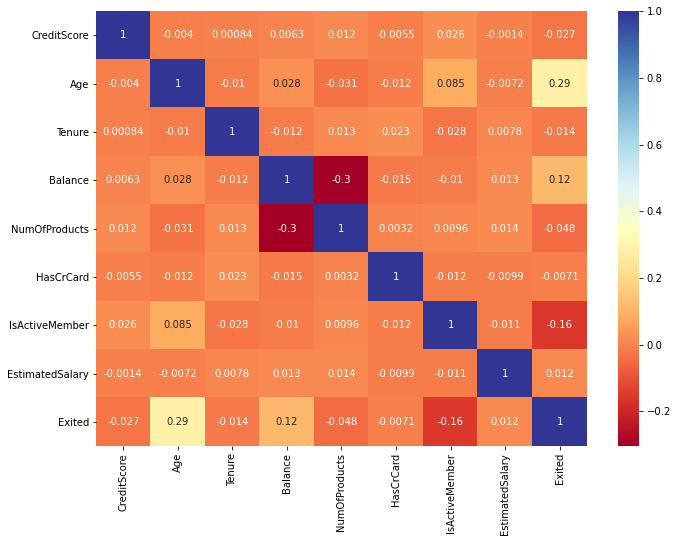

In [9]:
#Heatmap to visualize correlation
plt.subplots(figsize=(11,8))
sns.heatmap(data.corr(), annot=True, cmap="RdYlBu")
plt.show()

**Insights:**
- No columns are highly correlated

### Test train split and feature scaling


In [10]:
X_data = data.drop(labels=['Exited'], axis = 1)
y_data = data['Exited']

In [11]:
X_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
y_data.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

**Handle categorical values**

In [13]:
#Number of values in Geography
X_data['Geography'].value_counts()


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
#Number of values in Gender
X_data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
#Label encode
label1 = LabelEncoder()
X_data['Geography'] = label1.fit_transform(data['Geography'])

In [25]:
#Label encode
label1 = LabelEncoder()
X_data['Gender'] = label1.fit_transform(data['Gender'])

In [17]:
#Number of values in Geography
X_data['Geography'].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [26]:
X_data['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [18]:
#One hot encode Geography
X_data = pd.get_dummies(data, drop_first=True, columns=['Geography'])
X_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


We will use 80% of data for training and 20% for testing.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0, stratify = y_data)


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 12)
(2000, 12)
(8000,)
(2000,)


### Creating a model

Keras model object created with Sequential class. Keras layers and activation added to the model

In [30]:
model = Sequential()
model.add(Dense(X_data.shape[1], input_dim = X_data.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [31]:
X_data.shape

(10000, 12)

### Model compile [optimizers and loss functions]

Keras model should be "compiled" prior to training

Types of loss (function) and optimizer should be designated

In [32]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [107]:
#sgd = optimizers.Adam(lr = 0.001)

In [93]:
#model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model Summary 

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1664      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,949
Trainable params: 1,949
Non-trainable params: 0
_________________________________________________________________


### Model Training 

In [34]:
model.fit(X_train, y_train.values, batch_size = 10, epochs = 10, verbose = 1)

Epoch 1/10
800/800 [==============================] - 1s 665us/step - loss: 0.0680 - accuracy: 0.9755
Epoch 2/10
800/800 [==============================] - 1s 675us/step - loss: 4.5355e-04 - accuracy: 1.0000
Epoch 3/10
800/800 [==============================] - 1s 670us/step - loss: 1.0428e-04 - accuracy: 1.0000
Epoch 4/10
800/800 [==============================] - 1s 679us/step - loss: 3.9041e-05 - accuracy: 1.0000
Epoch 5/10
800/800 [==============================] - 1s 674us/step - loss: 1.8344e-05 - accuracy: 1.0000
Epoch 6/10
800/800 [==============================] - 1s 670us/step - loss: 9.5846e-06 - accuracy: 1.0000
Epoch 7/10
800/800 [==============================] - 1s 654us/step - loss: 5.3618e-06 - accuracy: 1.0000
Epoch 8/10
800/800 [==============================] - 1s 653us/step - loss: 3.1229e-06 - accuracy: 1.0000
Epoch 9/10
800/800 [==============================] - 1s 671us/step - loss: 1.8548e-06 - accuracy: 1.0000
Epoch 10/10
800/800 [=============================

### Model Evaluation


In [36]:
results = model.evaluate(X_test, y_test.values)

63/63 [==============================] - 0s 601us/step - loss: 0.0114 - accuracy: 1.0000


In [37]:
print(model.metrics_names)
print(results)   

['loss', 'accuracy']
[0.011358830146491528, 1.0]


In [38]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [42]:
y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

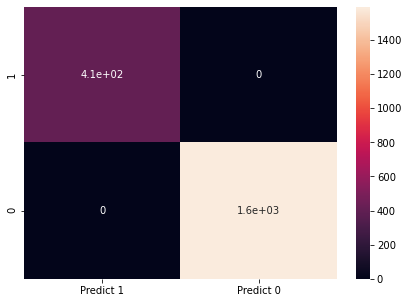

In [46]:
#Build confusion matrix
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [39]:
confusion_matrix(y_test, y_pred)

array([[1593,    0],
       [   0,  407]])

In [40]:
accuracy_score(y_test, y_pred)

1.0